In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression as mr
from sklearn.linear_model import LinearRegression

In [2]:
# the "mr" function is from a python package that generates "simulated" data
X, y = mr(n_samples=1000, n_features=500, noise=2)

# For now you may think the train data as history data, and test data as future data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# For now, it doesn't hurt for you to think of the below as a black box that
# learns a linear function "f" that maps "X" to "Y"

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# the following code computes the accuracy on the test set and print the accuracy
y_pred = lr_model.predict(X_test)

print("The (mean squared) error of linear regression model on the test data is ", np.sum((y_pred-y_test)**2)/len(y_test))


The (mean squared) error of linear regression model on the test data is  18.524455341117118


In [4]:
# The following code replicates each input variables into two identical input variables
X = np.concatenate((X,X), axis=1)

# the remaining is the same as above
# random_state ensures the same splitting of train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print("The (mean squared) error of linear regression model on the test data is ", np.sum((y_pred-y_test)**2)/len(y_pred))
#replication increases the error

The (mean squared) error of linear regression model on the test data is  25.61428913218388


In [9]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# Data outputs
Y = np.array([3.2, 1.7, 7.2, 4.0, 8.1])

# Calculate the overall average
average_output = np.mean(Y)

# K-fold cross-validation setup
kf = KFold(n_splits=5)

# To store mean absolute errors from each fold
mae_values = []

# 5-fold cross-validation
for train_index, test_index in kf.split(Y):
    # The test set output
    test_outputs = Y[test_index]
    
    # Predictions are simply the average output value repeated for the length of the test set
    predictions = np.array([average_output] * len(test_index))
    
    # Calculate MAE for this fold
    mae = mean_absolute_error(test_outputs, predictions)
    mae_values.append(mae)

# Average MAE across all folds
average_mae = np.mean(mae_values)
average_mae


2.248

In [1]:
# Values from the first column
X1_values = [1.3, 5.2, 100.8, 2.7, 3.1]

# Minimum and maximum values from the first column
min_X1 = min(X1_values)
max_X1 = max(X1_values)

# Applying min-max normalization to each value in the first column
normalized_X1 = [(x - min_X1) / (max_X1 - min_X1) for x in X1_values]
normalized_X1


[0.0, 0.03919597989949749, 1.0, 0.01407035175879397, 0.018090452261306532]

In [2]:
import numpy as np

# Values from the second column
X2_values = [5.1, 3.8, 4.2, 1.1, -123.2]

# Calculating the mean and standard deviation of the second column
mu_X2 = np.mean(X2_values)
sigma_X2 = np.std(X2_values)

# Applying Z-score normalization to each value in the second column
normalized_X2 = [(x - mu_X2) / sigma_X2 for x in X2_values]
normalized_X2, mu_X2, sigma_X2

([0.5303885897443587,
  0.5047564274147057,
  0.5126432465930605,
  0.451520397960811,
  -1.999308661712936],
 -21.8,
 50.71753148567071)

In [3]:
# Transforming the new sample X2 = 5.5 using the calculated mean and standard deviation
new_X2_sample = 5.5
normalized_new_X2 = (new_X2_sample - mu_X2) / sigma_X2
normalized_new_X2

0.5382754089227135

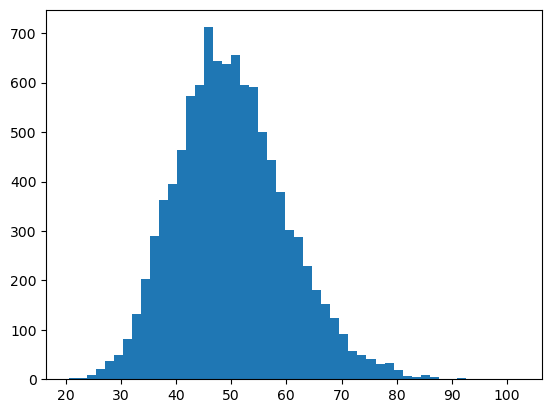

In [8]:
# 5: K-nearest neighbours: Curse of dimensionality
import numpy as np
p = 50
mu = np.zeros([p]) # mean of the random vector
Sigma = np.identity(p) # covariance matrix of the random vector


X = np.random.multivariate_normal(mu, Sigma, 10000)
X_distance_to_origin = np.sum(X**2, axis=1)
import matplotlib.pyplot as plt
fig = plt.figure()
plt.hist(X_distance_to_origin,bins=50)
plt.show()

In [10]:
# Ind 1 Assignment
import numpy as np

# Training data for sepal length and sepal width (A1-A9)
sepal_length = np.array([6.4, 6.6, 5.5, 5.4, 5.1, 6.8, 5.7, 5.7, 5.7])
sepal_width = np.array([2.7, 3.0, 2.4, 3.9, 3.5, 3.0, 2.6, 2.5, 3.8])

# Calculate mean and standard deviation for both features in the training data
mean_length = np.mean(sepal_length)
std_length = np.std(sepal_length)
mean_width = np.mean(sepal_width)
std_width = np.std(sepal_width)

# Normalization function using Z-score
def normalize(data, mean, std):
    return (data - mean) / std

# Apply normalization to training data
normalized_length_train = normalize(sepal_length, mean_length, std_length)
normalized_width_train = normalize(sepal_width, mean_width, std_width)

# Display normalization parameters and normalized training data
print("Mean Length:", mean_length, "Std Length:", std_length)
print("Mean Width:", mean_width, "Std Width:", std_width)
print("Normalized Length (Training):", normalized_length_train)
print("Normalized Width (Training):", normalized_width_train)

Mean Length: 5.877777777777777 Std Length: 0.5492980930803677
Mean Width: 3.0444444444444447 Std Width: 0.531478255248951
Normalized Length (Training): [ 0.95070824  1.31480927 -0.68774638 -0.8697969  -1.41594844  1.67891029
 -0.32364536 -0.32364536 -0.32364536]
Normalized Width (Training): [-0.64808756 -0.0836242  -1.21255091  1.60976587  0.85714806 -0.0836242
 -0.83624201 -1.02439646  1.42161142]
